# Getting started

Requires **HyperSpy 1.3 or above**

## Summary

This tutorial shows how to load, save and visualise data with HyperSpy as well as other basic functionalities.

Although not strictly required, some knowledge of Python can help with getting the most out of HyperSpy. If you are new to Python, the [official tutorial](https://docs.python.org/2/tutorial/index.html) is an excellent way to start.

This tutorial can be enjoyed interactively thanks to the [Jupyter Notebook](http://jupyter.org) and [IPython](http://ipython.org). If you are not familiar with the Jupyter Notebook, having a look at the `Help` menu above and the [IPython documentation](http://ipython.readthedocs.io/en/stable/interactive/index.html) is highly recommended.

To save this webpage as an interactively useable IPython notebook, click on the "download" icon at the top-right of the webpage and save the resulting code with the suffix ".ipynb" (this should be proposed by default). If Hyperspy has been installed, the notebook can then be launched by double-clicking the saved file (Mac and Linux) or right-clicking the folder containing the file (Windows) and then clicking again on the notebook filename in the tab that will have opened in your browser. This will open another tab containing the interactive version of this page.

Important note: in the Jupyter notebook, to execute a command or group of commands in a cell, place the cursor in the cell and press 'shift+return'.

This notebook is a trimmed down version of that found at https://github.com/hyperspy/hyperspy-demos/blob/master/1_Getting_Started.ipynb. The example notebooks found there offer an excellent way to start using hyperspy and we highly recommend them for further reading.

## Table of Contents

1. [Importing HyperSpy](#1.-Importing-HyperSpy)
2. [Getting help](#2.-Getting-help)
3. [Structure overview](#3.-Structure-overview)
4. [Visualisation](#4.-Visualisation)
5. [Signal and navigation axes](#5.-Signal-and-navigation-axes)
6. [Saving to file](#6.-Saving-to-file)
7. [Indexing](#7.-Indexing)
8. [Process with external function](#8.-Process-with-external-function)


**IMPORTANT:** Before you start create/download the datasets executing the code in the [Appendix](#Appendix).

## Pre-amble. A few python basics.

As in all programming languages, python uses 'variables' to "store" data. A variable can hold pretty much any object but common ones include integers, floating point numbers and strings.

In [4]:
a = 3 #integer
b = 3.0 #float
c = 'three' #string
print(a, b, c)

3 3.0 three


Python is a dynamically typed language, which means you can change a variable to any type before running code. This has good and bad points!

In [6]:
a = 'three'
print(a)

three


One of the main components of programming are functions. These are self-contained bits of code that take in variables (called 'arguments' of a function) and provide an output. Below shows how to define a function in python.

In [7]:
def add(a, b):
    summed = a+b
    return(summed)

In [9]:
result = add(1,3)
print(result)

4


One of the big benefits of python is the ecosystem of 'packages' that support scientific computing.

## 1. Importing HyperSpy

As any other Python library, to use HyperSpy first need to "import" it. The public HyperSpy API can be imported executing

    import hyperspy.api as hs
    
However, in order to enable interactive plotting in IPython we need to activate the matplotlib "backend" first using the [%matplotlib IPython magic](http://ipython.readthedocs.io/en/stable/interactive/plotting.html).

**NOTE:** A "backend" in this context refers to the code determining way in which plotted data will be displayed. In the online version of this document we use the `inline` backend that displays non-interactive figures inside the Jupyter Notebook. However, for interactive data analysis purposes most would prefer to use the `qt4`, `wx` or `nbagg` backends. 
    
 

In [2]:
# This is a Python comment line - anything after a hashtag is a non-executed comment
%matplotlib nbagg 
# You can replace 'nbagg' with any other available toolkit e.g 'qt4', 'tk'...
import hyperspy.api as hs
# Don't worry about the warning below, they're just for information

## 2. Getting help

HyperSpy documentation includes

* The [User Guide](http://hyperspy.org/hyperspy-doc/current/index.html)
* The docstrings (see below)
* The [demos](http://nbviewer.jupyter.org/github/hyperspy/hyperspy-demos/tree/master/).


### Docstrings

In Python most objects include their own documentation  (docstring in Python jargon). In the Jupyter notebook you can consult the documentation interactively by:

* Adding a question mark to the object, e.g. load?
* If the object is a function or a method, by pressing the ``Shift + Tab`` keys after writing the first brackets, e.g. load(&lt;``Shift + Tab``>


All HyperSpy public objects are contained in the ``hs`` variable that we have imported above. Let's practice the different methods to access the docstrings by inspecting the ``hs`` doctring:

In [2]:
hs?

### Very useful tip: "Autocompletion"

In fact, long commands like the previous one can be entered more quickly using the ``tab`` key. Just enter the first few letters of the command, press ``tab`` and a list of the possible commands will appear. Navigate to the required command with the arrow keys (you still need the brackets at the end). If you are in interactive mode, try it in the cell below:

In [ ]:
hs.

## 3. Loading data from  a file

More typically we load data from files using the `hs.load` function. The following code loads the ``CL1.rpl`` file in the ``machine_learning`` folder and stores it in the `s` variable.

In [9]:
s = hs.load("machine_learning/CL1.hdf5")

Let's check what is inside the `s` variable

In [10]:
s

<EELSSpectrum, title: , dimensions: (64, 64|1024)>

HyperSpy has loaded the data into an EELSSpectrum object that we have stored in the *s* variable. The symbol | separates the navigation dimensions *x*, *y* and the signal dimensions, in this case *energy loss*.


The metadata read from the file is stored in the ``original_metadata`` attribute.

In [11]:
s.original_metadata

├── beam-energy = 100.0
├── byte-order = dont-care
├── collection-angle = 10.0
├── convergence-angle = 7.0
├── data-length = 8
├── data-type = float
├── depth = 1024
├── depth-name = EnergyLoss
├── depth-origin = 100.0
├── depth-scale = 0.5
├── depth-units = eV
├── ev-per-chan = 1.0
├── height = 64
├── height-name = Y
├── height-origin = 0.0
├── height-scale = 1.0
├── height-units = cm
├── key = value
├── offset = 0
├── record-by = vector
├── signal = EELS
├── width = 64
├── width-name = X
├── width-origin = 0.0
├── width-scale = 1.0
└── width-units = cm

Part of this information is also available in the ``metadata`` attribute. HyperSpy only uses internally the information in ``metadata``.

In [12]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 10.0
│       ├── beam_energy = 100.0
│       └── convergence_angle = 7.0
├── General
│   ├── original_filename = CL1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EELS

The metadata can be easily modified:

In [13]:
s.metadata.Acquisition_instrument.TEM.convergence_angle = 10

In [14]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 10.0
│       ├── beam_energy = 100.0
│       └── convergence_angle = 10
├── General
│   ├── original_filename = CL1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EELS

## 4. Axis properties

The axes are stored in the `axes_manager` attribute:

In [15]:
s.axes_manager

<Axes manager, axes: (64, 64|1024)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               X |     64 |      0 |       0 |       1 |     cm 
               Y |     64 |      0 |       0 |       1 |     cm 
---------------- | ------ | ------ | ------- | ------- | ------ 
      EnergyLoss |   1024 |        |   1e+02 |     0.5 |     eV

The `AxesManager` can be indexed:

In [16]:
s.axes_manager[0]

<X axis, size: 64, index: 0>

It is also possible to access the axes by name:

In [17]:
s.axes_manager["EnergyLoss"]

<EnergyLoss axis, size: 1024>

The axes have `offset`, `scale`, `units` and `name` attributes

In [18]:
s.axes_manager["EnergyLoss"].scale

0.5

In [19]:
s.axes_manager["EnergyLoss"].units

'eV'

## 5. Visualisation

<IPython.core.display.Javascript object>


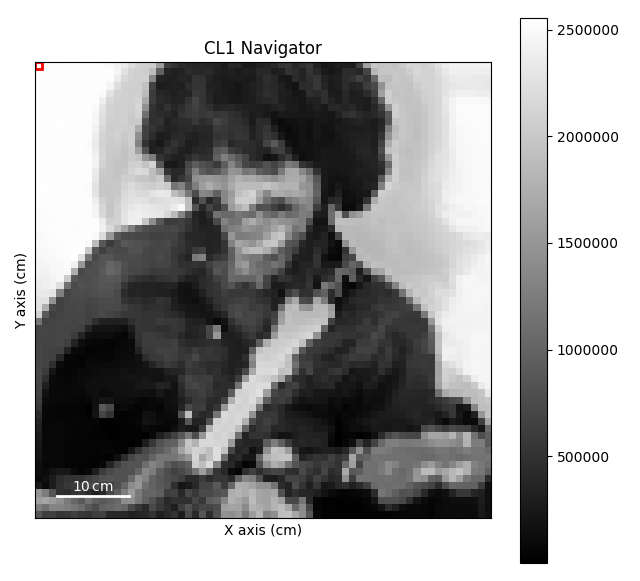

<IPython.core.display.Javascript object>


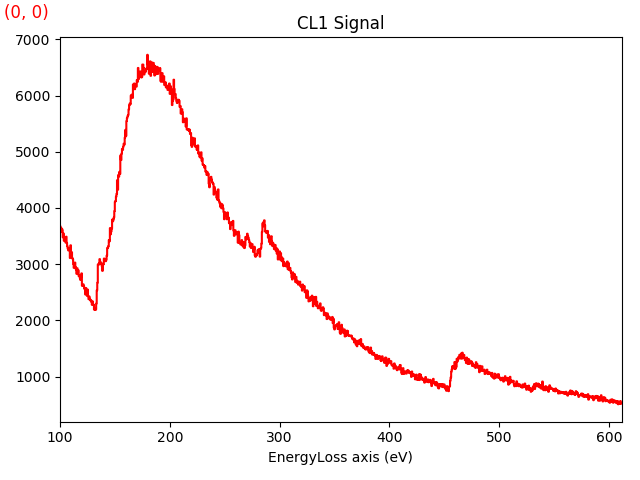

In [20]:
s.plot()

### Moving around 

* Using the keyboard arrow keys
* Using the pointer

### Other shortcuts


* Two pointers: enable/disable by pressing **e**
* Adjust image contrast:  press **h**
* Increase/decrease the pointer size: **+** and **-** keys

When using HyperSpy, it is common to have many open figures at a given time. The `close` [matplotlib](http://matplotlib.org) command is useful to close all the images at once, but, for that, first we have to import matplotlib:

In [21]:
import matplotlib.pyplot as plt
plt.close("all")

## 5. Signal and navigation axes

We can change the way in  which Hyperspy "sees" the data by converting the ``EELSSpectrum`` into a ``Signal2D`` object

In [22]:
im = s.to_signal2D()

The ``im`` variable now contains a ``Signal2D`` object that shares the data with the ``EELSSpectrum`` object in ``s``.

In [23]:
im

<Signal2D, title: , dimensions: (1024|64, 64)>

Now we can visualize the same data in the "energy filtered" way

<IPython.core.display.Javascript object>


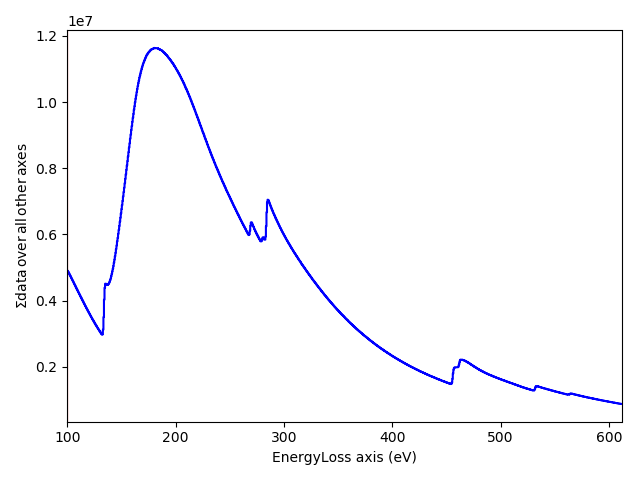

<IPython.core.display.Javascript object>


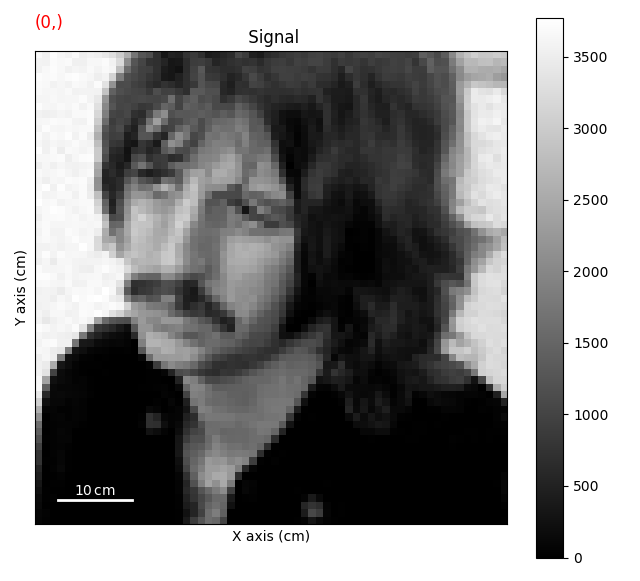

In [24]:
im.plot()

## 6. Saving to file

In [25]:
im.save('CL1_as_image', overwrite=True)

By default HyperSpy writes to the HDF5 file format.

To save to another format you must specify the extension, e.g.:

In [26]:
im.save('CL1_as_image.tif', overwrite=True)

We can load it to verify that we do get back what we saved

In [27]:
im = hs.load('CL1_as_image.tif')

<IPython.core.display.Javascript object>


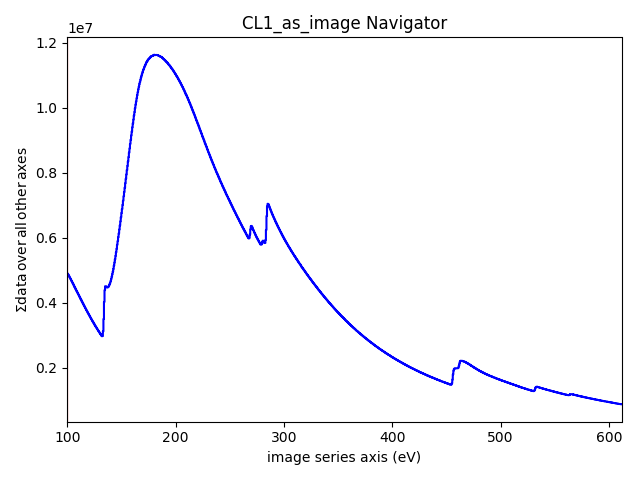

<IPython.core.display.Javascript object>


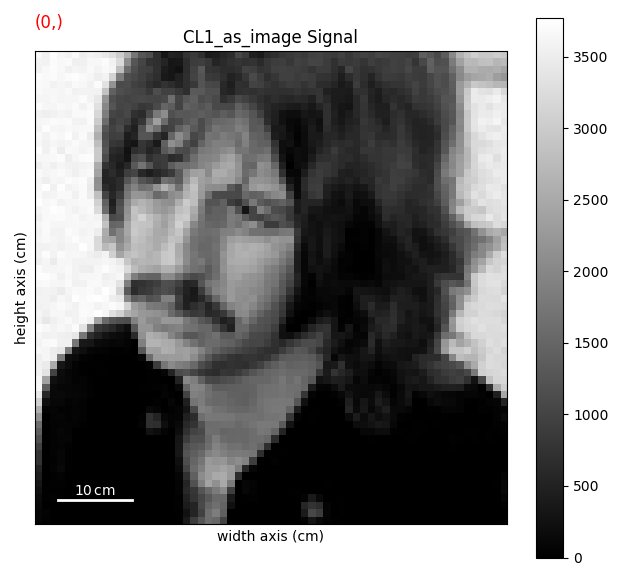

In [28]:
im.plot()

## Appendix

### Download and unpack the machine learning example data

In [ ]:
from urllib.request import urlretrieve, urlopen
from zipfile import ZipFile
files = urlretrieve("https://www.dropbox.com/s/dt6bc3dtg373ahw/machine_learning.zip?raw=1", "./machine_learning.zip")

with ZipFile("machine_learning.zip") as z:
    z.extractall()